# Analysis of Delaware SAT Score Data

By Mycah Detorres
For CISC108 Introduction to Computer Science Fall 2020

**Origin**: This notebook analyzes SAT Score data from the Common Core of Data (CCD) reports. The Common Core of Data is the main database of public elementary and secondary education in the United States. This data was made available through the [CORGIS collection](https://think.cs.vt.edu/corgis/json/). The data describes the ranges of SAT scores for each state in the United Staes over the years from 2005 to 2015. The data also describes other information such as family income, GPA, and academic subjects taken by students. 

**Importance**: This data is important for understanding the trend in SAT scores throughout the United States. The SAT is a test used to determine a student's readiness for college. SAT scores are a significant factor for admission decisions when applying to colleges and universities. The data can be used to determine if overall scores have increased or decreased over the years for specific states or the United States in general. This data can be used to interpret the number of students who may be accepted into colleges, based upon the overall SAT scores. 

# Loading the Data

In [2]:
# Load the JSON data with Requests
import requests
reports = requests.get("https://think.cs.vt.edu/corgis/datasets/json/school_scores/school_scores.json").json()

# Preview the first row of data
from pprint import pprint
pprint(reports[0])

{'Academic Subjects': {'Arts/Music': {'Average GPA': 3.92,
                                      'Average Years': 2.2},
                       'English': {'Average GPA': 3.53, 'Average Years': 3.9},
                       'Foreign Languages': {'Average GPA': 3.54,
                                             'Average Years': 2.6},
                       'Mathematics': {'Average GPA': 3.41,
                                       'Average Years': 4.0},
                       'Natural Sciences': {'Average GPA': 3.52,
                                            'Average Years': 3.9},
                       'Social Sciences/History': {'Average GPA': 3.59,
                                                   'Average Years': 3.9}},
 'Family Income': {'Between 20-40k': {'Math': 513,
                                      'Test-takers': 324,
                                      'Verbal': 527},
                   'Between 40-60k': {'Math': 539,
                                      'Test-takers':

# Histogram Analysis

For my histogram, I will analyze the math SAT score rates across all states in the United States for a single year (2015).

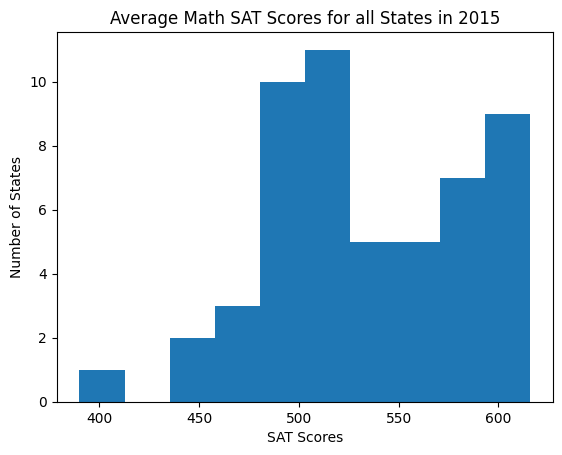

In [98]:
# Preprocess
satscoresMath = []
for report in reports:
    # Filter out all years excepts 2015
    if report["Year"] == 2015:
        satscoresMath.append(report["Total"]["Math"])

# Make the graphs
import matplotlib.pyplot as plt
plt.hist(satscoresMath)
plt.title("Average Math SAT Scores for all States in 2015")
plt.xlabel("SAT Scores")
plt.ylabel("Number of States")
plt.show()

My histogram shows the frequency of particular average math SAT scores across all states in the year 2015. Each column represents the number of states who have a certain average math SAT score. The tallest columns are around 500 and 600 for the average math SAT scores. This indicates that most states have an average math SAT score around 500 or 600. The smallest columns are around 400 and 450, suggesting that the the least amount of states have an average math SAT score around 400 or 450. 

# Trend Analysis

For my second analysis, I will create two line plots that display the number of students with a Math SAT score of 700 to 800 over time as well as a Verbal SAT score of 700 to 800 over time, for the state of Delaware. 

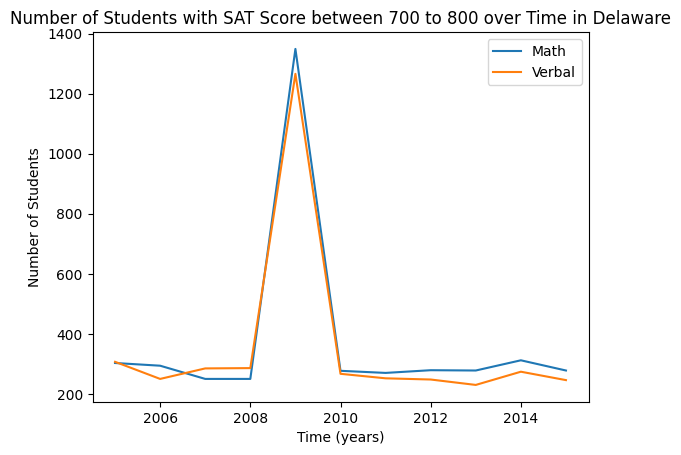

In [99]:
#Preprocess
delaware_highMath = []
delaware_highVerbal = []
delaware_years = []
for report in reports:
    # Filter out all states except Delaware
    if report["State"]["Name"] == 'Delaware':
        #Collect data from the SAT score between 700 and 800 for Math and Verbal
        totalStudentsMath = report["Score Ranges"]["Between 700 to 800"]["Math"]["Total"]
        totalStudentsVerbal = report["Score Ranges"]["Between 700 to 800"]["Verbal"]["Total"]
        delaware_highMath.append(totalStudentsMath)
        delaware_highVerbal.append(totalStudentsVerbal)
        #Collect the specific year
        delaware_years.append(report['Year'])

#Make the line graphs        
plt.plot(delaware_years, delaware_highMath)
plt.plot(delaware_years, delaware_highVerbal)
plt.xlabel("Time (years)")
plt.ylabel("Number of Students")
plt.title("Number of Students with SAT Score between 700 to 800 over Time in Delaware")
plt.legend(['Math', 'Verbal'])
plt.show()

These line graphs plots the number of students who have an SAT score of 700 to 800 over time (years). The blue lines represents the number of students who got a Math score between 700 and 800. The orange line represents the number of students who got a Verbal score between 700 and 800. The blue line starts around 300 and goes slightly down to about 250 over a four year period from 2005 to 2008, indicating that the number of students who got a Math score of 700 to 800 slightly declined. The orange line starts around 300 and goes slightly down 250, and then goes slightly up again to 300, over a four year period from 2005 to 2008, indicating that the number of students who got a Math score of 700 to 800 was generally the same. In 2009, both lines peak all the way up to about 1300, indicating the the number of students who got a Math or Verbal score significantly increased for that year. For the following year in 2010, both lines return back down to around 270. For the following 5 years, the blue line moved slightly up, but generally remained constant, indicating that the number of students with an SAT score of 700 to 800 for Math remained constant. Over the same time period, the orange line moved slightly down, but generally remained constant, suggesting that the number if students with an SAT score of 700 to 800 for Verbal remained constant. Disregarding the outlier year of 2009, the overall trend shows that the number of students who scored between 700 to 800 for both the Math and Verbal section of the SAT remains constant at around 250 to 300 students. 

# Bar Graph Analysis

For my third analysis, I will analyze the GPA of students who have taken the SAT in the state of Delaware in 2015. 

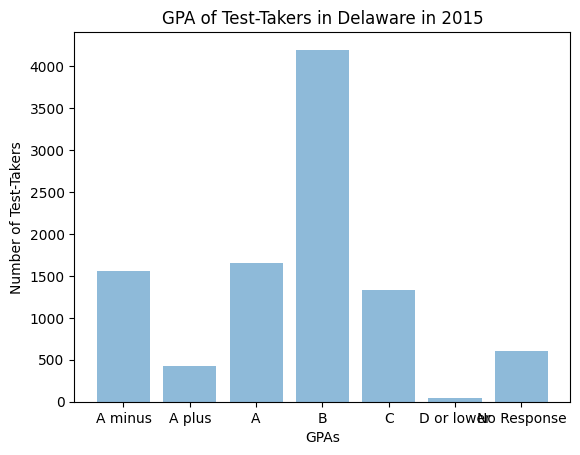

In [100]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Create each column and its name representing the different GPAs
GPAs = ("A minus", "A plus", "A", "B", "C", "D or lower", "No Response")
y_pos = np.arange(len(objects))

DE_testers = []
for report in reports:
    #Filter out all states except Delaware, and filter out all years except 2015
    if report["State"]["Name"] == "Delaware" and report["Year"] == 2015:
        #Collect data for number of students with a particular GPA
        for gpaKey, gpaVal  in report["GPA"].items():
            totalStudents = gpaVal["Test-takers"]
            DE_testers.append(totalStudents)

# Make the bar graph
plt.bar(y_pos, DE_testers, align='center', alpha=0.5)
plt.xticks(y_pos, GPAs)
plt.ylabel('Number of Test-Takers')
plt.xlabel("GPAs")
plt.title('GPA of Test-Takers in Delaware in 2015')
plt.show()

This bar graph displays the GPA of SAT test takers in Delaware in 2015. The columns represent the number of test takers who have a GPA of A minus, A plus, A, B, C, D or lower. The last column indicates the number of test takers who did not specify their GPA. The tallest column is for a GPA of B, which is significantly taller than the other columns. This indicates that most test takers had a GPA of a B in the state of Delaware in 2015. The number of students who had a GPA of A minus, A, and C were relatively the same around 1500 and were all lower than the number of students who had a GPA of B. The number of students who had a GPA of A plus was less than 500, and the smallest column was for a GPA of D or lower, which indicates that the least amount of test takers a D or lower for thier GPA. 

# Scatter Plot Analysis

For my fourth analysis, I will analyze family income versus the math SAT score of students in Delaware for all years (2005 - 2015).

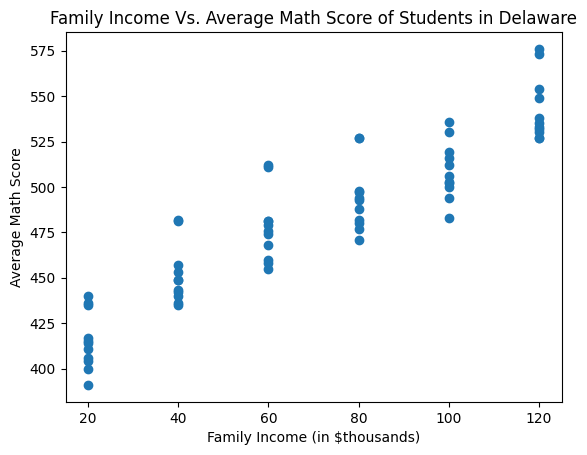

In [101]:
# Create x-axis for Family Income
family_income = []
for x in range(11):
    family_income.append(40)
    family_income.append(60)
    family_income.append(80)
    family_income.append(100)
    family_income.append(20)
    family_income.append(120)

# Create y axis for Average Math Score
avg_math_scores = []
for report in reports:
    # Filter out all states except Delaware
    if report["State"]["Name"] == "Delaware":
        # Collect data for math scores
        for incomeKey, incomeVal  in report["Family Income"].items():
            avgMathScore = incomeVal["Math"]
            avg_math_scores.append(avgMathScore)

# Make the scatter plot
plt.scatter(family_income, avg_math_scores)
plt.xlabel("Family Income (in $thousands)")
plt.ylabel("Average Math Score")
plt.title("Family Income Vs. Average Math Score of Students in Delaware")
plt.show()

This scatter plot displays family income (in $thousands) versus the average math SAT score for students in Delaware for all years (2005 - 2015). The plot displays a positive correlation between family income and average math score. This suggests that a higher family income means that the student generally has a higher average math SAT score. 

# Stakeholder Analysis

Two stakeholders who might be interested in this analysis are:

* High school students in Delaware who are planning to take the SAT, who might want to determine the average Math score they may get based upon their family income. They would be interested to know that with a higher family income generally means a higher average math score.
* Universities, who would be interested in gathering data about the math SAT score rates for all states in order to recruit new students. Knowing that most students get a Math score aruond 500 or 600, colleges may use this to determine the likelihood of students getting into this school.

The two stakeholders might conflict with one another. High school students who have access to this analysis may choose to go to a community college or choose to not go to college at all, knowing that their math score may be too low to get into colleges. Colleges would not want high school students to know that thir chances of getting a higher score could depend on thier family income, so that more students try to apply to that university and become students there. 